# **Sales Record analysis using Machine Learning Algorithm**

The aim of this project is to analyze a dataset and predict outcomes using various machine learning algorithms, with the goal of determining which model performs best.

In [1]:
#importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
dataset=pd.read_csv('100000 Sales Records.csv')

In [3]:
dataset

,Region,Country,Item Type,Sales Channel,Order Priority,Order Date,Order ID,Ship Date,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit
0,Middle East and North Africa,Azerbaijan,Snacks,Online,C,10/8/2014,535113847,10/23/2014,934,152.58,97.44,142509.72,91008.96,51500.76
1,Central America and the Caribbean,Panama,Cosmetics,Offline,L,2/22/2015,874708545,2/27/2015,4551,437.20,263.33,1989697.20,1198414.83,791282.37
2,Sub-Saharan Africa,Sao Tome and Principe,Fruits,Offline,M,12/9/2015,854349935,1/18/2016,9986,9.33,6.92,93169.38,69103.12,24066.26
3,Sub-Saharan Africa,Sao Tome and Principe,Personal Care,Online,M,9/17/2014,892836844,10/12/2014,9118,81.73,56.67,745214.14,516717.06,228497.08
4,Central America and the Caribbean,Belize,Household,Offline,H,2/4/2010,129280602,3/5/2010,5858,668.27,502.54,3914725.66,2943879.32,970846.34
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,Sub-Saharan Africa,Niger,Cereal,Offline,L,8/26/2012,836322486,9/11/2012,5263,205.70,117.11,1082599.10,616349.93,466249.17
99996,Europe,Poland,Meat,Offline,C,12/3/2013,110449349,12/10/2013,3272,421.89,364.69,1380424.08,1193265.68,187158.40
99997,Sub-Saharan Africa,Comoros,Clothes,Online,M,8/7/2013,193128764,8/31/2013,9948,109.28,35.84,1087117.44,356536.32,730581.12
99998,Middle East and North Africa,Kuwait,Cosmetics,Online,L,6/28/2011,701597058,7/3/2011,7015,437.20,263.33,3066958.00,1847259.95,1219698.05


# **Preprocessing the dataset**

In [4]:
dataset.shape

(100000, 14)

In [5]:
dataset.isnull().sum()

Region            0
Country           0
Item Type         0
Sales Channel     0
Order Priority    0
Order Date        0
Order ID          0
Ship Date         0
Units Sold        0
Unit Price        0
Unit Cost         0
Total Revenue     0
Total Cost        0
Total Profit      0
dtype: int64

Text(0.5, 0.98, 'Sales Channel')

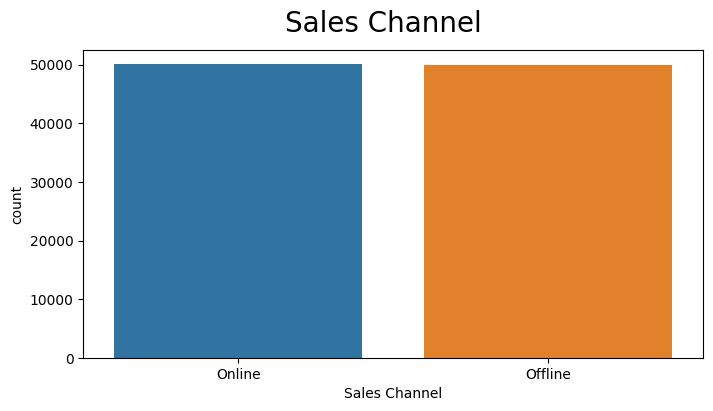

In [6]:
plt.figure(figsize=(8,4))
sns.countplot(data=dataset,x='Sales Channel')
plt.suptitle('Sales Channel',fontsize=20)

Text(0.5, 0.98, 'Visualizing the Order-priority')

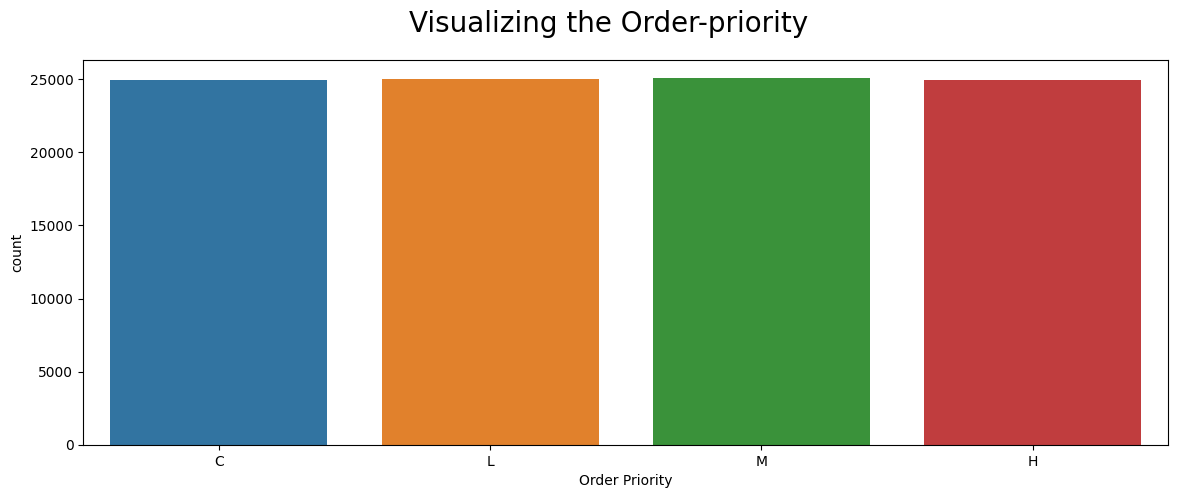

In [7]:
plt.figure(figsize=(14,5))
sns.countplot(data=dataset,x='Order Priority')
plt.suptitle('Visualizing the Order-priority',fontsize=20)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'Panama'),
  Text(1, 0, 'Malta'),
  Text(2, 0, 'Cambodia'),
  Text(3, 0, 'Tunisia '),
  Text(4, 0, 'Rwanda'),
  Text(5, 0, "Cote d'Ivoire"),
  Text(6, 0, 'Sudan'),
  Text(7, 0, 'Vatican City'),
  Text(8, 0, 'Mozambique'),
  Text(9, 0, 'New Zealand')])

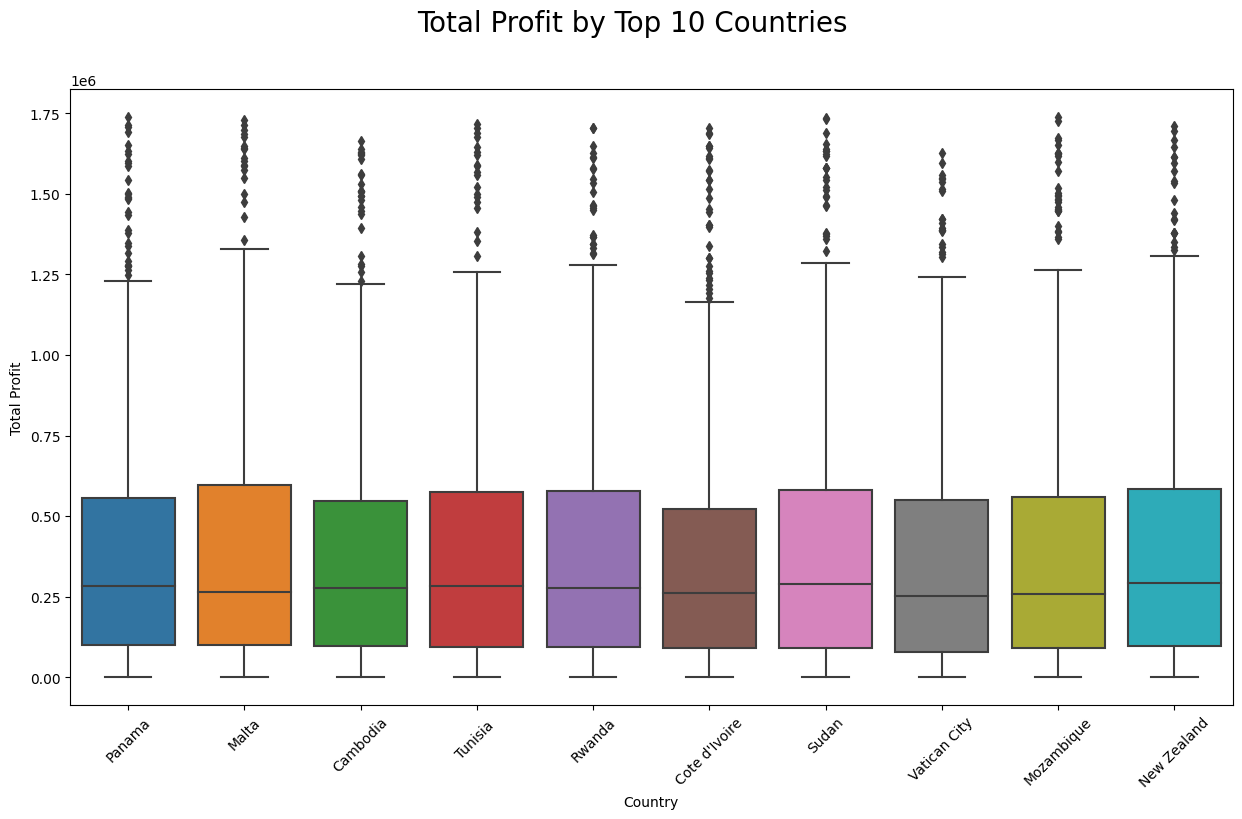

In [8]:
top_countries = dataset['Country'].value_counts().nlargest(10).index
data_top_countries = dataset[dataset['Country'].isin(top_countries)]
plt.figure(figsize=(15, 8))
sns.boxplot(x='Country', y='Total Profit', data=data_top_countries)
plt.suptitle('Total Profit by Top 10 Countries',fontsize=20)
plt.xticks(rotation=45)

Text(0.5, 0.98, 'Units Sold Over Time')

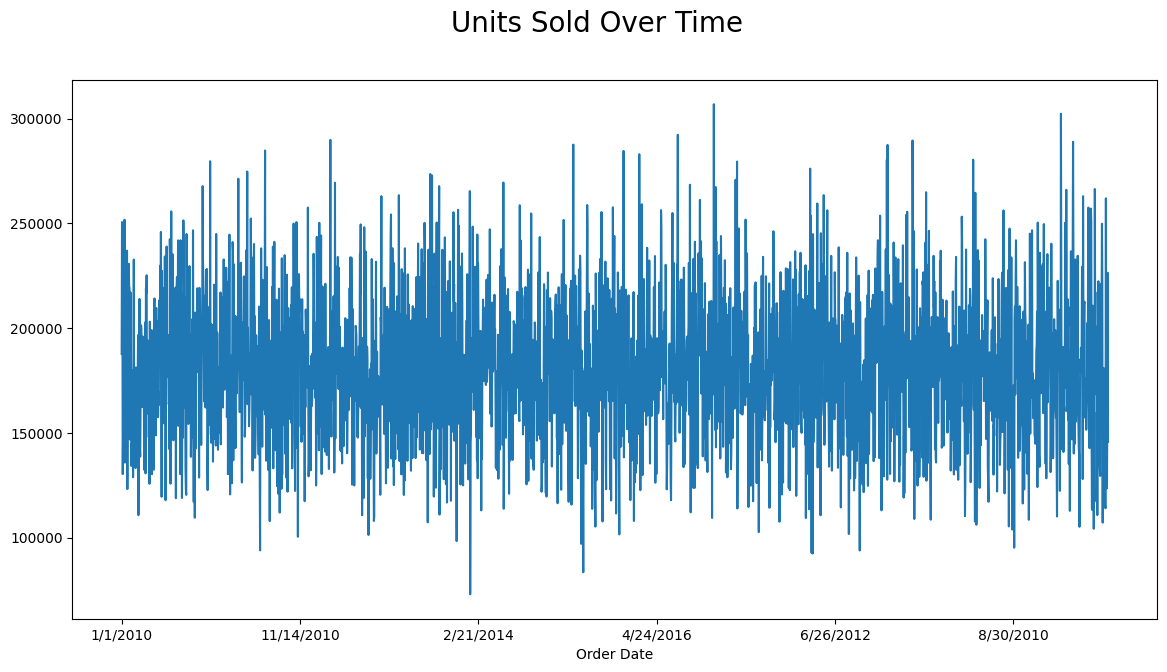

In [9]:
plt.figure(figsize=(14, 7))
dataset.groupby('Order Date')['Units Sold'].sum().plot()
plt.suptitle('Units Sold Over Time',fontsize=20)

Text(0.5, 0.98, 'Total Profit by Sales Channel')

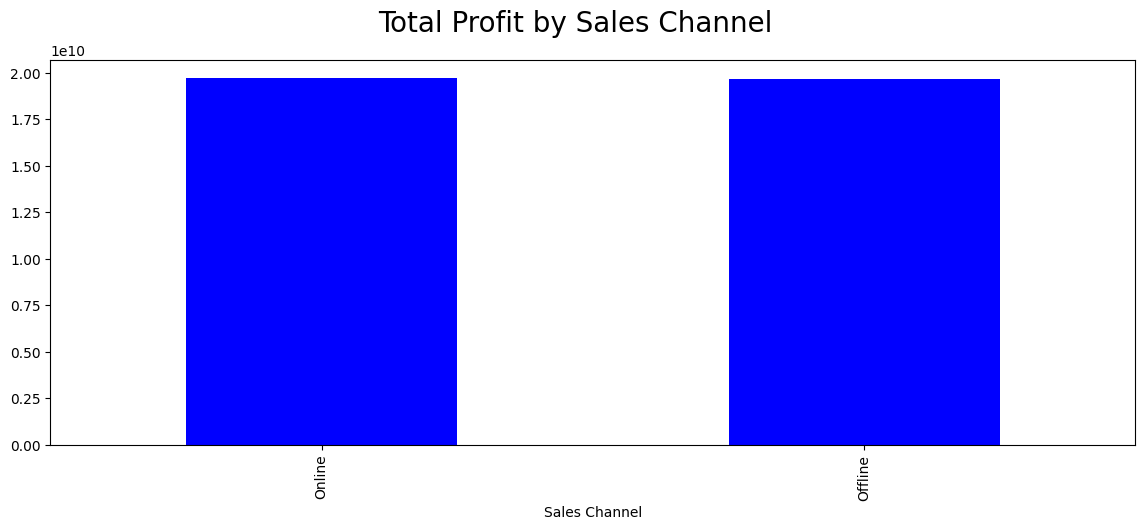

In [10]:
profit_by_channel = dataset.groupby('Sales Channel')['Total Profit'].sum().sort_values(ascending=False)
plt.figure(figsize=(14,5))
profit_by_channel.plot(kind='bar', color='blue')
plt.suptitle('Total Profit by Sales Channel',fontsize=20)

Text(0.5, 0.98, 'Distribution of Numerical Features')

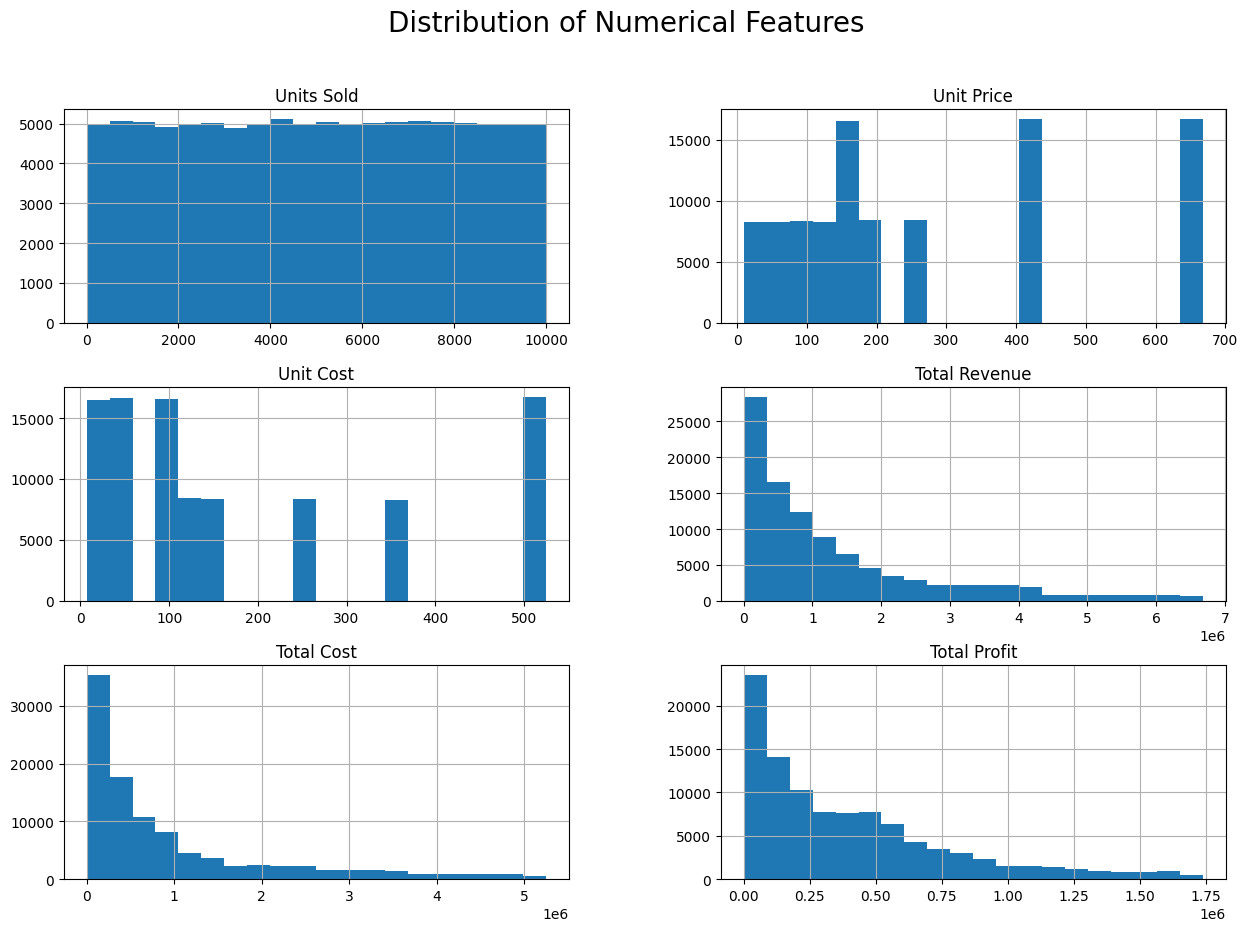

In [11]:
numerical_cols = ['Units Sold', 'Unit Price', 'Unit Cost', 'Total Revenue', 'Total Cost', 'Total Profit']
dataset[numerical_cols].hist(figsize=(15, 10), bins=20)
plt.suptitle('Distribution of Numerical Features',fontsize=20)

Text(0.5, 1.0, 'Correlation Matrix')

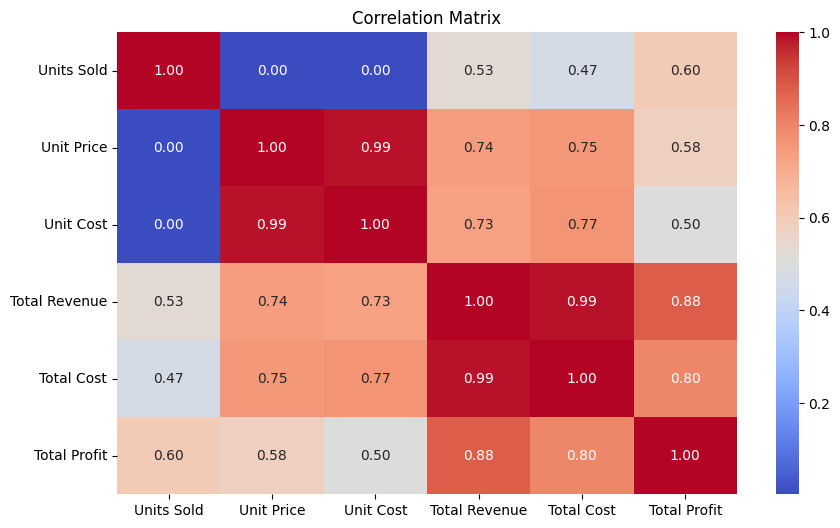

In [12]:
plt.figure(figsize=(10, 6))
sns.heatmap(dataset[numerical_cols].corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')

In [13]:
from sklearn.preprocessing import LabelEncoder, StandardScaler

In [14]:
label=LabelEncoder()
scale=StandardScaler()

In [15]:
#Preprocessing the labeled data's in the dataset
dataset['Region']=label.fit_transform(dataset['Region'])
dataset['Country']=label.fit_transform(dataset['Country'])
dataset['Item Type']=label.fit_transform(dataset['Item Type'])
dataset['Sales Channel']=label.fit_transform(dataset['Sales Channel'])
dataset['Order Priority']=label.fit_transform(dataset['Order Priority'])
dataset['Order Date']=label.fit_transform(dataset['Order Date'])
dataset['Ship Date']=label.fit_transform(dataset['Ship Date'])

In [16]:
#Preprocessing the numeric data's in the dataset.
dataset['Units Sold']=scale.fit_transform(dataset['Units Sold'].values.reshape(-1,1))
dataset['Unit Price']=scale.fit_transform(dataset['Unit Price'].values.reshape(-1,1))
dataset['Unit Cost']=scale.fit_transform(dataset['Unit Cost'].values.reshape(-1,1))
dataset['Total Revenue']=scale.fit_transform(dataset['Total Revenue'].values.reshape(-1,1))
dataset['Total Cost']=scale.fit_transform(dataset['Total Cost'].values.reshape(-1,1))
dataset['Total Profit']=scale.fit_transform(dataset['Total Profit'].values.reshape(-1,1))

# **Splitting the dataset**

In [17]:
from sklearn.model_selection import train_test_split

In [18]:
x=dataset[['Region','Country','Item Type','Sales Channel','Order Priority','Order Date','Ship Date','Units Sold','Unit Price','Unit Cost','Total Revenue','Total Cost']]
y=dataset['Total Profit']

In [19]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3)

# **Importing the machine learning model and fitting the dataset**

In [20]:
#Importing the machine learning libraries
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.neural_network import MLPRegressor
from xgboost import XGBRegressor

In [21]:
model_1=LinearRegression()

In [22]:
model_1.fit(x_train,y_train)

LinearRegression()

In [23]:
model_1.score(x_train,y_train)

1.0

In [24]:
y_pred_1=model_1.predict(x_test)

In [25]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score,median_absolute_error

In [26]:
print('Mean_Squared_error',mean_squared_error(y_test,y_pred_1))
print('Mean_Absolute_error',mean_absolute_error(y_test,y_pred_1))
print('R2_score',r2_score(y_test,y_pred_1))
print('Median_absolute_error',median_absolute_error(y_test,y_pred_1))

Mean_Squared_error 5.464026169153505e-29
Mean_Absolute_error 5.949700302292747e-15
R2_score 1.0
Median_absolute_error 5.10702591327572e-15


In [27]:
model_2=DecisionTreeRegressor()

In [28]:
model_2.fit(x_train,y_train)

DecisionTreeRegressor()

In [29]:
model_2.score(x_train,y_train)

1.0

In [30]:
y_pred_2=model_2.predict(x_test)

In [31]:
print('Mean_Squared_error',mean_squared_error(y_test,y_pred_2))
print('Mean_Absolute_error',mean_absolute_error(y_test,y_pred_2))
print('R2_score',r2_score(y_test,y_pred_2))
print('Median_absolute_error',median_absolute_error(y_test,y_pred_2))

Mean_Squared_error 1.4088791079253349e-06
Mean_Absolute_error 0.00033911087408701994
R2_score 0.9999985998275516
Median_absolute_error 0.00016630808228136618


In [32]:
model_3=SVR()

In [ ]:
model_3.fit(x_train,y_train)

In [ ]:
model_3.score(x_train,y_train)

In [ ]:
y_pred_3=model_3.predict(x_test)

In [ ]:
print('Mean_Squared_error',mean_squared_error(y_test,y_pred_3))
print('Mean_Absolute_error',mean_absolute_error(y_test,y_pred_3))
print('R2_score',r2_score(y_test,y_pred_3))
print('Median_absolute_error',median_absolute_error(y_test,y_pred_3))

In [ ]:
model_4=RandomForestRegressor()

In [ ]:
model_4.fit(x_train,y_train)

In [ ]:
model_4.score(x_train,y_train)

In [ ]:
y_pred_4=model_4.predict(x_test)

In [ ]:
print('Mean_Squared_error',mean_squared_error(y_test,y_pred_4))
print('Mean_Absolute_error',mean_absolute_error(y_test,y_pred_4))
print('R2_score',r2_score(y_test,y_pred_4))
print('Median_absolute_error',median_absolute_error(y_test,y_pred_4))

In [ ]:
model_5=KNeighborsRegressor()

In [ ]:
model_5.fit(x_train,y_train)

In [ ]:
model_5.score(x_train,y_train)

In [ ]:
y_pred_5=model_5.predict(x_test)

In [ ]:
print('Mean_Squared_error',mean_squared_error(y_test,y_pred_5))
print('Mean_Absolute_error',mean_absolute_error(y_test,y_pred_5))
print('R2_score',r2_score(y_test,y_pred_5))
print('Median_absolute_error',median_absolute_error(y_test,y_pred_5))

In [ ]:
model_6=GradientBoostingRegressor()

In [ ]:
model_6.fit(x_train,y_train)

In [ ]:
model_6.score(x_train,y_train)

In [ ]:
y_pred_6=model_6.predict(x_test)

In [ ]:
print('Mean_Squared_error',mean_squared_error(y_test,y_pred_6))
print('Mean_Absolute_error',mean_absolute_error(y_test,y_pred_6))
print('R2_score',r2_score(y_test,y_pred_6))
print('Median_absolute_error',median_absolute_error(y_test,y_pred_6))

In [ ]:
model_7=XGBRegressor()

In [ ]:
model_7.fit(x_train,y_train)

In [ ]:
model_7.score(x_train,y_train)

In [ ]:
y_pred_7=model_7.predict(x_test)

In [ ]:
print('Mean_Squared_error',mean_squared_error(y_test,y_pred_7))
print('Mean_Absolute_error',mean_absolute_error(y_test,y_pred_7))
print('R2_score',r2_score(y_test,y_pred_7))
print('Median_absolute_error',median_absolute_error(y_test,y_pred_7))

# **Visualizing the training performance**

In [ ]:
#Let's enter the model name and the performance detail's
model_name=['Linear_regression','Decision_tree_Regressor','SVR','Random_forest_Regressor','KNN','Gradient_boost','XGBoost']
model_train_performance=[model_1.score(x_train,y_train),model_2.score(x_train,y_train),model_3.score(x_train,y_train),model_4.score(x_train,y_train),model_5.score(x_train,y_train),model_6.score(x_train,y_train),model_7.score(x_train,y_train)]

In [ ]:
print('The Training score of Linear Regression is:',model_1.score(x_train,y_train))
print('The Training score of Decision Tree is:',model_2.score(x_train,y_train))
print('The Training score of Random Forest is:',model_3.score(x_train,y_train))
print('The Training score of KNN is:',model_4.score(x_train,y_train))
print('The Training score of SVM is:',model_5.score(x_train,y_train))
print('The Training score of GradientBoost is:',model_6.score(x_train,y_train))
print('The Training score of XGBoost is:',model_7.score(x_train,y_train))

In [ ]:
plt.figure(figsize=(12,4))
sns.barplot(x=model_name,y=model_train_performance)
plt.xticks(rotation=90)
plt.suptitle('Training Score Of Each Model',fontsize=20)

# **Testing performance of each model**

In [ ]:
model_test_performance=[r2_score(y_test,y_pred_1),r2_score(y_test,y_pred_2),r2_score(y_test,y_pred_3),r2_score(y_test,y_pred_4),r2_score(y_test,y_pred_5),r2_score(y_test,y_pred_6),r2_score(y_test,y_pred_7)]

In [ ]:
print('The Testing score of Linear Regression is:',r2_score(y_test,y_pred_1))
print('The Testing score of Decision Tree is:',r2_score(y_test,y_pred_2))
print('The Testing score of SVM is:',r2_score(y_test,y_pred_3))
print('The Testing score of Random Forest is:',r2_score(y_test,y_pred_4))
print('The Testing score of KNN is:',r2_score(y_test,y_pred_5))
print('The Testing score of GradientBoost is:',r2_score(y_test,y_pred_6))
print('The Testing score of XGBoost is:',r2_score(y_test,y_pred_7))

In [ ]:
plt.figure(figsize=(12,4))
sns.barplot(x=model_name,y=model_test_performance)
plt.xticks(rotation=90)
plt.suptitle('Testing Score Of Each Model',fontsize=20)